In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
# import tensorflow as tf
from numpy import newaxis
import scipy.stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm, metrics,preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Sultan\\OneDrive - Middle Tennessee State University\\Courses\\Dr.Poudel_research\\IEEECLA23\\Code'

In [3]:
# path="C:/Users/Sultan/OneDrive - Middle Tennessee State University/Courses/Dr.Poudel_research/IEEECLA23/mimic-iii-clinical-database-demo-1.4/"
df =pd.read_csv('mimic_preprocessed_fil.csv')
df=df.drop(columns=['amount_x'])
print(df.shape)
df.info()
df.head(5)
# df.isnull().sum().sum()
# df.columns

(48, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      48 non-null     int64  
 1   ethnicity       48 non-null     object 
 2   value_x         48 non-null     float64
 3   amount_y        48 non-null     float64
 4   spec_type_desc  48 non-null     object 
 5   value_y         48 non-null     float64
 6   curr_service    48 non-null     object 
 7   los             48 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.1+ KB


,subject_id,ethnicity,value_x,amount_y,spec_type_desc,value_y,curr_service,los
0,40124,WHITE,95.9,999.999984,BLOOD CULTURE,1.0,MED,2.4549
1,40177,WHITE,86.0,1000.000000,BLOOD CULTURE,1.0,MED,1.1116
2,40204,BLACK/AFRICAN AMERICAN,90.0,139.520149,BLOOD CULTURE,1.0,MED,0.8592
3,40277,WHITE,245.0,104.999996,URINE,1784.0,MED,1.2620
4,40286,WHITE,24.6,1.000000,MRSA SCREEN,35.0,ORTHO,1.7299


In [4]:
# col_name=df.columns
# print(col_name)
# df['curr_service'].value_counts()

In [5]:
### XGBoost

In [6]:
encoder = OrdinalEncoder()

In [7]:
df['ethnicity_endc']=encoder.fit_transform(df['ethnicity'].values.reshape(-1,1))
df['spec_type_desc_endc']=encoder.fit_transform(df['spec_type_desc'].values.reshape(-1,1))
df['curr_service_endc']=encoder.fit_transform(df['curr_service'].values.reshape(-1,1))
df.head(4)

,subject_id,ethnicity,value_x,amount_y,spec_type_desc,value_y,curr_service,los,ethnicity_endc,spec_type_desc_endc,curr_service_endc
0,40124,WHITE,95.9,999.999984,BLOOD CULTURE,1.0,MED,2.4549,7.0,0.0,3.0
1,40177,WHITE,86.0,1000.000000,BLOOD CULTURE,1.0,MED,1.1116,7.0,0.0,3.0
2,40204,BLACK/AFRICAN AMERICAN,90.0,139.520149,BLOOD CULTURE,1.0,MED,0.8592,1.0,0.0,3.0
3,40277,WHITE,245.0,104.999996,URINE,1784.0,MED,1.2620,7.0,8.0,3.0


In [8]:
df_tr=df[['subject_id','value_x','amount_y', 'value_y','ethnicity_endc','spec_type_desc_endc','curr_service_endc', 'los']]
print(df_tr.shape)
print(df_tr.dtypes)
df_tr2=df_tr.rename(columns={'subject_id':'sub','value_x':'SAL/HR','amount_y':'DRA', 'value_y':'ICD9','ethnicity_endc':'ETH','spec_type_desc_endc':'MIC','curr_service_endc':'CSE', 'los':'LOS'})
df_tr2.head(6)
# y=df['los']


(48, 8)
subject_id               int64
value_x                float64
amount_y               float64
value_y                float64
ethnicity_endc         float64
spec_type_desc_endc    float64
curr_service_endc      float64
los                    float64
dtype: object


,sub,SAL/HR,DRA,ICD9,ETH,MIC,CSE,LOS
0,40124,95.9,999.999984,1.0,7.0,0.0,3.0,2.4549
1,40177,86.0,1000.000000,1.0,7.0,0.0,3.0,1.1116
2,40204,90.0,139.520149,1.0,1.0,0.0,3.0,0.8592
3,40277,245.0,104.999996,1784.0,7.0,8.0,3.0,1.2620
4,40286,24.6,1.000000,35.0,7.0,4.0,7.0,1.7299
5,40304,67.0,987.167024,266.0,7.0,8.0,9.0,1.1474


In [9]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df_tr, c=df_tr['los'],marker='o', s=10,alpha=.8)
# plt.show()

In [10]:
df_trbox=df_tr2.iloc[1:5,0:3]
df_trbox

,sub,SAL/HR,DRA
1,40177,86.0,1000.000000
2,40204,90.0,139.520149
3,40277,245.0,104.999996
4,40286,24.6,1.000000


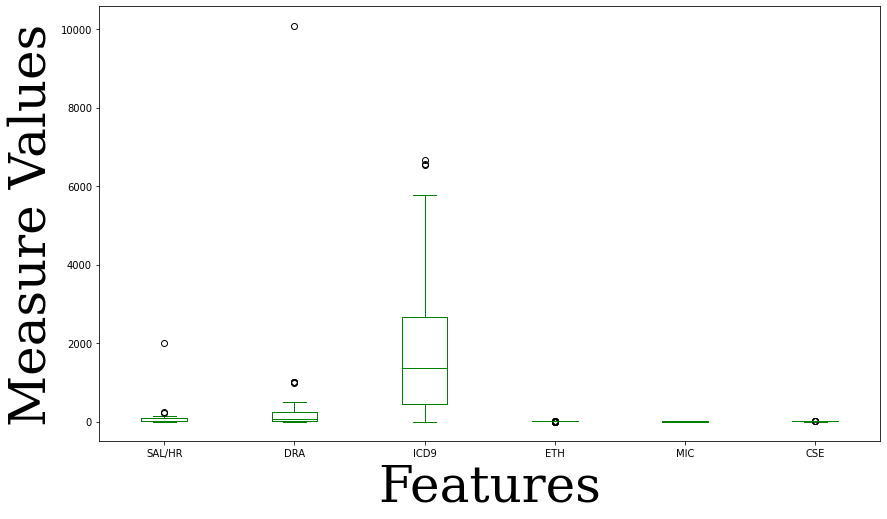

In [11]:
df_trbox=df_tr2.iloc[:,0:7]
df_trbox.head(3)
# plt.rcParams.update({'font.size': 25}) # must set in top
f1 = {'family':'serif','color':'blue','size':50}
f2 = {'family':'serif','color':'darkred','size':50}
%matplotlib inline
# df.plot();
df_trbox.plot(x='sub',kind='box', color='g', figsize=(14,8), widths = 0.35,patch_artist = False)
plt.ylabel('Measure Values', fontdict=f1, c='k')
plt.xlabel('Features', fontdict=f1, c='k')
plt.rcParams['ytick.labelsize']=35
plt.rcParams['xtick.labelsize']=35
plt.show()

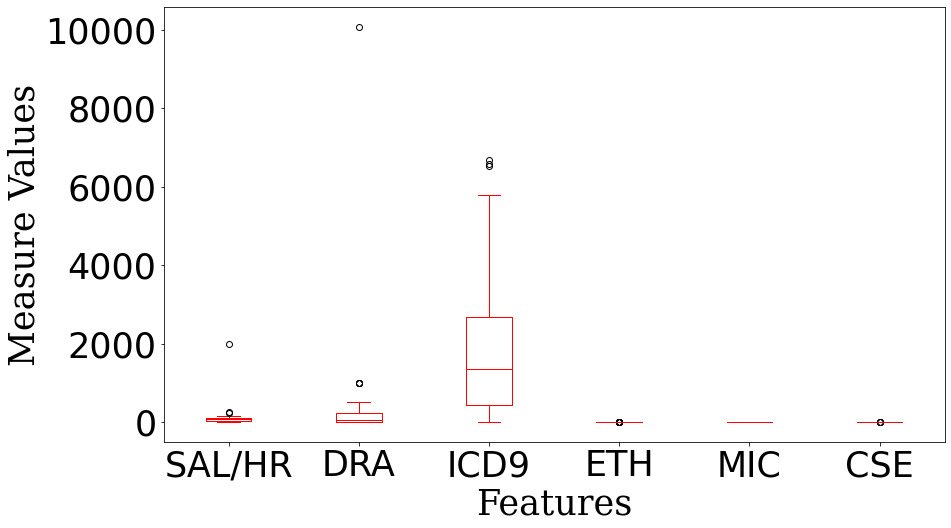

In [12]:
df_trbox=df_tr2.iloc[:,0:7]
df_trbox.head(3)
# plt.rcParams.update({'font.size': 25}) # must set in top
f1 = {'family':'serif','color':'blue','size':35}
f2 = {'family':'serif','color':'darkred','size':35}
%matplotlib inline
# df.plot();
df_trbox.plot(x='sub',kind='box', color='r', figsize=(14,8), widths = 0.35,patch_artist = False)
plt.ylabel('Measure Values', fontdict=f1, c='k')
plt.xlabel('Features', fontdict=f1, c='k')
plt.rcParams['ytick.labelsize']=35
plt.rcParams['xtick.labelsize']=35
plt.show()

In [13]:
# df_trbox.iloc[:,0:7]

In [14]:
# df_tr2.plot(x='CSE',y='LOS',kind='scatter',color='r')

In [15]:
df_tr2.iloc[:,1:-1].astype(float)

,SAL/HR,DRA,ICD9,ETH,MIC,CSE
0,95.9,999.999984,1.0,7.0,0.0,3.0
1,86.0,1000.000000,1.0,7.0,0.0,3.0
2,90.0,139.520149,1.0,1.0,0.0,3.0
3,245.0,104.999996,1784.0,7.0,8.0,3.0
4,24.6,1.000000,35.0,7.0,4.0,7.0
5,67.0,987.167024,266.0,7.0,8.0,9.0
6,0.0,60.000000,4052.0,7.0,8.0,3.0
7,0.0,400.000000,2801.0,7.0,0.0,3.0
8,51.0,247.833338,1488.0,7.0,4.0,0.0
9,76.0,240.000000,4750.0,7.0,1.0,1.0


In [16]:
df_tr2.iloc[:,-1]

0      2.4549
1      1.1116
2      0.8592
3      1.2620
4      1.7299
5      1.1474
6     19.5761
7      2.0003
8      1.0337
9      8.9255
10     2.4872
11     3.5465
12     0.7146
13     1.6694
14    10.7341
15    12.9903
16     2.5803
17     0.8799
18     5.0956
19    13.3570
20     1.2607
21     5.4263
22     1.1358
23     0.7974
24     3.7760
25     1.0316
26     0.9911
27     1.9121
28     0.9538
29    29.2601
30     1.7404
31     1.0082
32     1.0429
33     1.9657
34     4.2467
35     0.7437
36     7.1076
37     2.4031
38     2.2821
39     0.9775
40     1.9252
41     0.1904
42     1.3153
43     1.9287
44     0.6259
45    31.1235
46     1.3279
47     4.6191
Name: LOS, dtype: float64

In [17]:
X,y=df_tr2.iloc[:,1:-1].astype(float),df_tr2.iloc[:,-1]

In [18]:
# plt.figure(figsize=(10,8))
# hist = X.hist(bins=5)
# plt.show()

In [19]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix.feature_names

['SAL/HR', 'DRA', 'ICD9', 'ETH', 'MIC', 'CSE']

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
# for i in range(64,115):
xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.3,subsample=0.8, learning_rate = 0.1,
                max_depth = 5,booster='dart', alpha = 10, n_estimators = 100, random_state=114)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2scores=r2_score(y_test, preds)
print("RMSE: %f" % (rmse), "r2scores: %f" % (r2scores))

RMSE: 1.778857 r2scores: -0.857769


In [23]:
len(y_test)

10

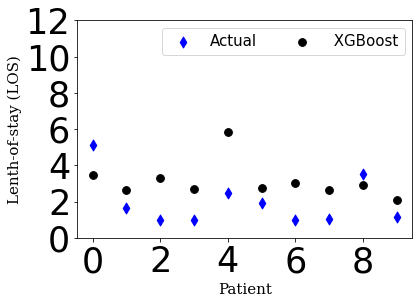

In [24]:
a=np.arange(0,len(y_test))
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
# ens=plt.scatter(a,ens_pred,c='r', s=60)
act=plt.scatter(a,y_test, c='b', marker='d', s=60)
xgb=plt.scatter(a,preds, c='k', marker='o', s=60)
plt.ylabel('Lenth-of-stay (LOS)', fontdict=font1, c='k')
plt.xlabel('Patient', fontdict=font1, c='k')
plt.ylim(0,12)
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.legend((act, xgb),
           ('Actual', ' XGBoost'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=15)
plt.show()

In [25]:
## rs=18,64=66.9
preds

array([3.4850025, 2.6210184, 3.3264768, 2.6854103, 5.8291755, 2.764685 ,
       3.019321 , 2.6288195, 2.92939  , 2.1007729], dtype=float32)

In [26]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7,8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5,0.6 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.6, 0.7, 0.8 ],
#     "booster" :['dart, gbtree'],
'objective': ['reg:tweedie']
    }

In [28]:
# pred

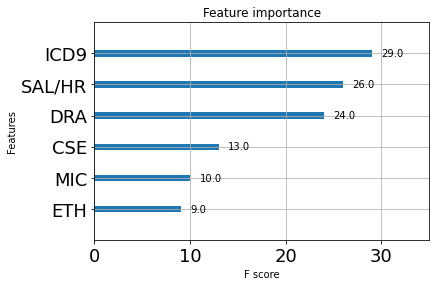

In [29]:
import xgboost as xgb
xgb.plot_importance(xg_reg, xlim=(0,35))
plt.rcParams['figure.figsize'] = [12,8 ]
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.rcParams.update({'font.size': 22})
plt.show()

In [30]:
## SVR regression 
from sklearn.svm import SVR
reg_svr = SVR(kernel = 'rbf', C=10)
reg_svr.fit(X_train, y_train)
svr_pred=reg_svr.predict(X_test)
## SVR regression Error
rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
r2scores=r2_score(y_test, svr_pred)
print("RMSE: %f" % (rmse), "r2scores: %f" % (r2scores))

RMSE: 1.649957 r2scores: -0.598286


In [31]:
rf_regr = RandomForestRegressor(n_estimators=20,max_depth=2, random_state=0)
rf_regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

In [33]:
# estimators

In [34]:
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
svr_reg=SVR(kernel = 'rbf', C=10)
rf_reg=RandomForestRegressor(n_estimators=100,max_depth=5,criterion="squared_error", random_state=14)
xgb_reg=xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.3,subsample=0.8, learning_rate = 0.1,
                max_depth = 5,booster='dart', alpha = 10, n_estimators = 100, random_state=114)
vot_reg= VotingRegressor([('svr', svr_reg),('rf',rf_reg),('xgb', xgb_reg)])

### Fitting the regressor
svr_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
vot_reg.fit(X_train, y_train)
## Prediction
psvr=svr_reg.predict(X_test)
prf=rf_reg.predict(X_test)
pxgb=xgb_reg.predict(X_test)
pvot=vot_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pvot))
r2scores=r2_score(y_test, pvot)
# print("RMSE: %f" % (rmse), "r2scores: %f" % (r2scores))

## R2 for each regressor
# r2scores=r2_score(y_test, pvot)
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, psvr))), "SVRr2scores: %f" % (r2_score(y_test, psvr)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, prf))), "RFr2scores: %f" % (r2_score(y_test, prf)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, pxgb))), "XGBr2scores: %f" % (r2_score(y_test, pxgb)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, prf))), "Voting2scores: %f" % (r2_score(y_test, pvot)))

RMSE: 1.649957 SVRr2scores: -0.598286
RMSE: 7.134096 RFr2scores: -28.880470
RMSE: 1.778857 XGBr2scores: -0.857769
RMSE: 7.134096 Voting2scores: -3.416330


In [35]:
# plt.plot(psvr,"gd", label="GradientBoostingRegressor")

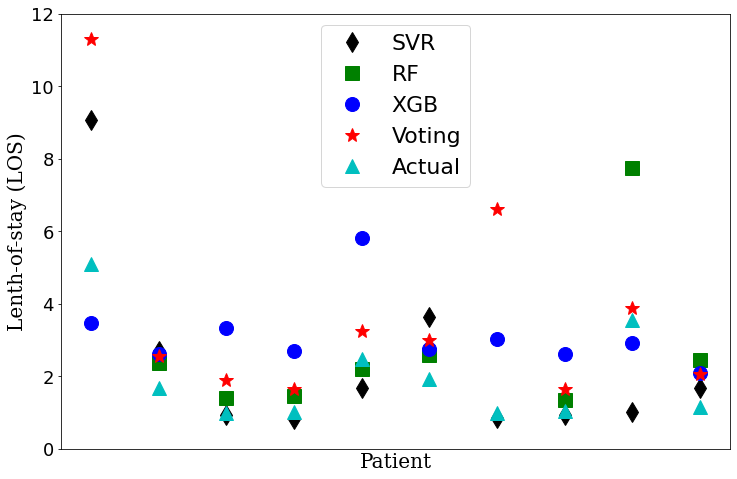

In [36]:
font1 = {'family':'serif','color':'blue','size':20}
plt.figure()
plt.plot(psvr,"kd",ms=14, label="SVR")
plt.plot(prf, "gs",ms=14, label="RF")
plt.plot(pxgb, "bo", ms=14,label="XGB")
plt.plot(pvot, "r*", ms=14, label="Voting")
plt.plot(y_test.values,  "c^",ms=14, label="Actual")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel('Lenth-of-stay (LOS)', fontdict=font1, c='k')
plt.xlabel('Patient', fontdict=font1, c='k')
plt.legend(loc="best")
plt.ylim(0,12)
# plt.title("Regressor predictions and their average")
plt.show()

In [37]:
# r2scores=r2_score(y_test, pvot)
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, psvr))), "SVRr2scores: %f" % (r2_score(y_test, psvr)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, prf))), "RFr2scores: %f" % (r2_score(y_test, prf)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, pxgb))), "XGBr2scores: %f" % (r2_score(y_test, pxgb)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, prf))), "XGBr2scores: %f" % (r2_score(y_test, pvot)))

RMSE: 1.649957 SVRr2scores: -0.598286
RMSE: 7.134096 RFr2scores: -28.880470
RMSE: 1.778857 XGBr2scores: -0.857769
RMSE: 7.134096 XGBr2scores: -3.416330


In [38]:
y_test.values

array([5.0956, 1.6694, 0.9911, 1.0082, 2.4872, 1.9252, 0.9775, 1.0337,
       3.5465, 1.1474])

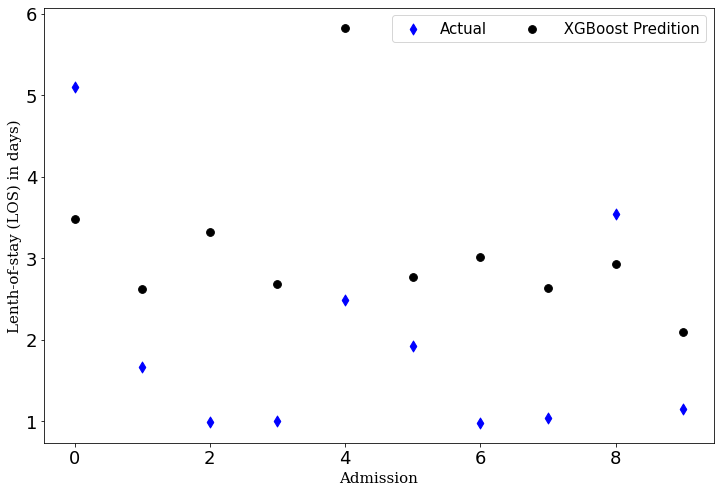

In [39]:
# a=np.arange(0,len(ens_pred))
a=np.arange(0,len(pvot))
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
# ens=plt.scatter(a,ens_pred,c='r', s=60)
act=plt.scatter(a,y_test, c='b', marker='d', s=60)
xgb=plt.scatter(a,preds, c='k', marker='o', s=60)
plt.ylabel('Lenth-of-stay (LOS) in days)', fontdict=font1, c='k')
plt.xlabel('Admission', fontdict=font1, c='k')
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.legend((act, xgb),
           ('Actual', ' XGBoost Predition'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=15)
plt.show()

### [Voting Regressor](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

### Bar cahrt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 360x288 with 0 Axes>

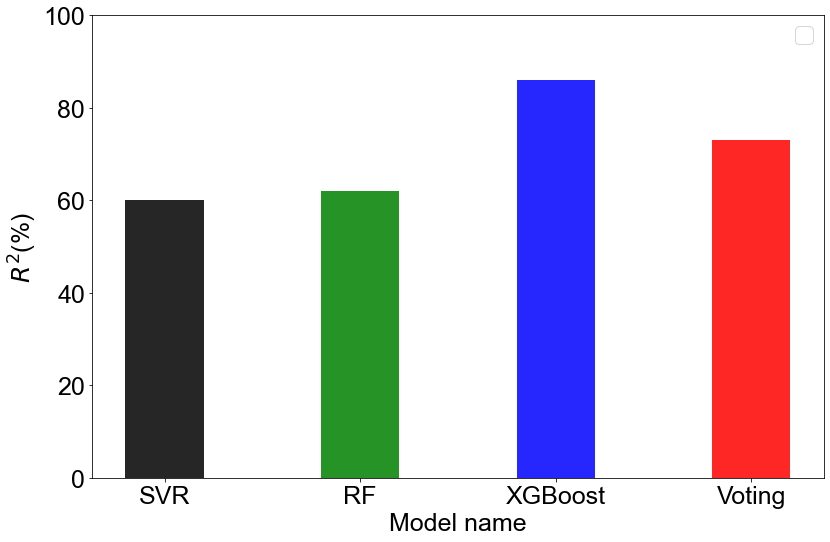

In [40]:
plt.figure(figsize=(5,4))
cp_evk=[60,62,86,73,]; #rs=11
n_groups = len(cp_evk)
# cp_ind=[47.5,55.0,67.5,72.5];# rs=23
#Manually data
# clear = [61.29,54.84,54.84,51.29]
# noise = [59.38,59.38,59.38,53.12]
# create plot
axis_font = {'fontname':'Arial', 'size':'25'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 
rects1 = plt.bar(index, cp_evk,
                 alpha=opacity,
                 color=['k','g','b','r',],width=bar_width
                 #label=r'$R^{2}$'
                )
plt.xlabel('Model name',**axis_font)
plt.ylabel('$R^{2}$'  '(%)',**axis_font)
# plt.title('Whole-brain',**axis_font)
plt.ylim(0,100)
#plt.xticks(index + bar_width-0.2, ('Theta','Alpha', 'Beta', 'Gamma'))
plt.xticks(index, ('SVR','RF','XGBoost','Voting'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=22,#loc='upper center'
          )
plt.tight_layout()
# plt.rcParams['ytick.labelsize']=35
# plt.rcParams['xtick.labelsize']=80
plt.show()
#fig.savefig('LH_band.png')

 ** END**